# Cafe Price Optimisation based on price elasticity of demand
                                                                                               Code Written By: Dasari Mohan

Pricing a product is a crucial aspect in any business. Alot of thought process is out into it. There are different strategies to price different kinds of products. There are products whose sales are quite sensitive to their prices and as such a small change in their price can lead to noticeable change in their sales. While there are products whose sales are not much affected by their price - these tend to be either luxury items or necessities (like certain medicines). This notebook will focus on the former type of products.

Price elasticity of demand (Epd), or elasticity, is the degree to which the effective desire for something changes as its price changes. In general, people desire things less as those things become more expensive. However, for some products, the customer's desire could drop sharply even with a little price increase, and for other products, it could stay almost the same even with a big price increase. Economists use the term elasticity to denote this sensitivity to price increases. More precisely, price elasticity gives the percentage change in quantity demanded when there is a one percent increase in price, holding everything else constant.


Mathematically speaking, the price elasticity of demand is defined to be the percentage change in quantity demanded, q,divided by the percentage change in price, p. The formula for the price elasticity (ǫ) is: 

$$e = \%ΔQ/ \%ΔP$$

## Objective :
To find Optimal prices for a cafe food items to increase profit for the client(Vendor)

In this notebook, we shall look at the sales of the items of a cafe. This cafe sells burgers, coke, lemonade and coffee. As a data scientist, it is my task to figure out the optimal prices to set for these items. If the price is set too high, the sales will drop & the price is set to low, then the margins will decrease. 

What is the sweet spot that will give us the maximum profit?

In [9]:
# Import the required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [3]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Loading the data

In [5]:
sold = pd.read_csv('Cafe_Sell_Meta_Data.csv')
transactions = pd.read_csv('Cafe_Transaction_Store.csv')
date_info = pd.read_csv('Cafe_DateInfo.csv')

In [6]:
sold.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


SELL_ID: a categorical variable, identifier of the combination of items that is contained in the product.

SELL_CATEGORY: “0” identifies single products; the category “2” identifies the combo ones.

ITEM_ID: a categorical variable, identifier of the item that is contained in the product.

ITEM_NAME: a categorical variable, identifying the name of the item

In [7]:
sold.describe()
sold.describe(include = ['O']) 

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


# Exploring Data Analysis

In [8]:
sold.isnull().mean()*100

SELL_ID          0.0
SELL_CATEGORY    0.0
ITEM_ID          0.0
ITEM_NAME        0.0
dtype: float64

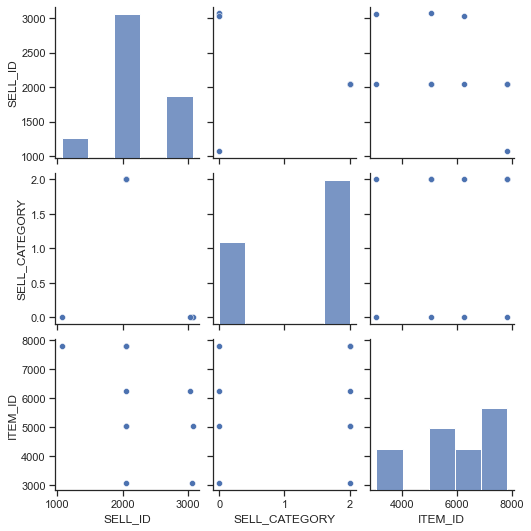

In [10]:
sns.pairplot(sold)

### Lets take a look at Transcations data

In [12]:
transactions.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


CALENDAR_DATE: a date/time variable, having the time always set to 00:00 AM.

PRICE: a numeric variable, associated with the price of the product identified by the SELL_ID.

QUANTITY: a numeric variable, associated with the quantity of the product sold, identified by the SELL_ID.

SELL_ID: a categorical variable, identifier of the product sold.

SELL_CATEGORY: a categorical variable, category of the product sold.

In [13]:
transactions.describe()
transactions.describe(include = ['O'])

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [14]:
transactions.isnull().mean()*100

CALENDAR_DATE    0.0
PRICE            0.0
QUANTITY         0.0
SELL_ID          0.0
SELL_CATEGORY    0.0
dtype: float64

(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

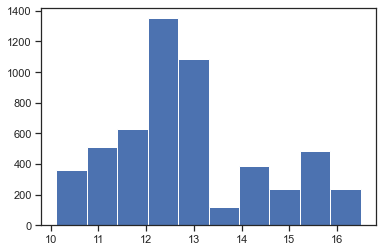

In [15]:
plt.hist(transactions.PRICE)

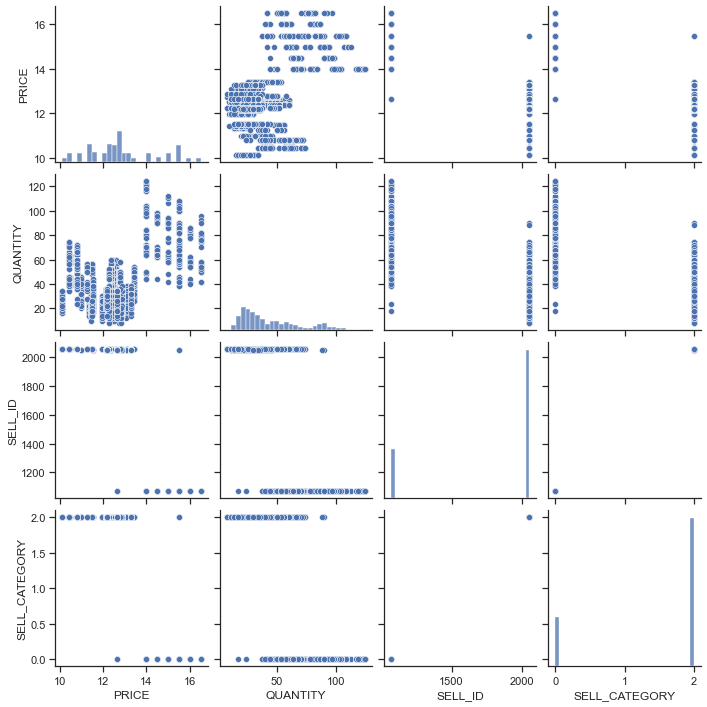

In [16]:
sns.pairplot(transactions)

### Lets take a look at Date Info

In [17]:
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [18]:
date_info.describe()
date_info.describe(include = ['O'])

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [19]:
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [20]:
date_info.isnull().mean()*100

CALENDAR_DATE           0.000000
YEAR                    0.000000
HOLIDAY                92.216457
IS_WEEKEND              0.000000
IS_SCHOOLBREAK          0.000000
AVERAGE_TEMPERATURE     0.000000
IS_OUTDOOR              0.000000
dtype: float64

#### Observation:
Here holiday column has 92% of null values, lets fill the null values with 'No Holiday'

In [21]:
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")

In [23]:
date_info.isnull().mean()*100

CALENDAR_DATE          0.0
YEAR                   0.0
HOLIDAY                0.0
IS_WEEKEND             0.0
IS_SCHOOLBREAK         0.0
AVERAGE_TEMPERATURE    0.0
IS_OUTDOOR             0.0
dtype: float64

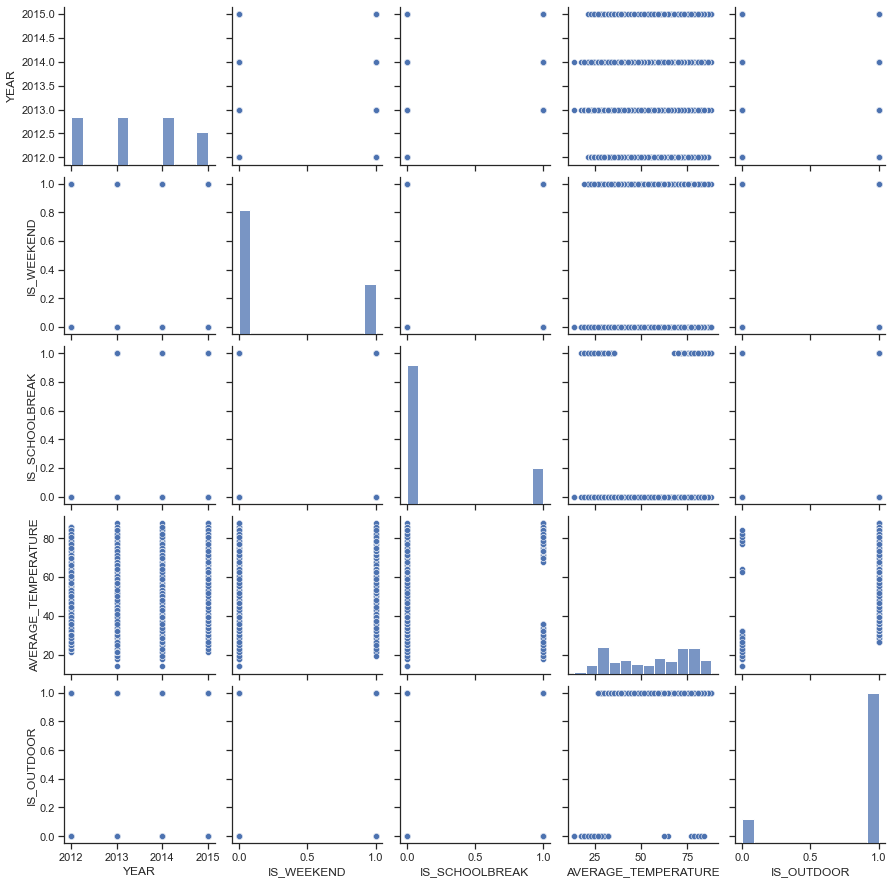

In [24]:
sns.pairplot(date_info)

# Understanding the data better

In [25]:
np.unique(date_info['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [26]:
date_info['CALENDAR_DATE'].min()

'1/1/12'

In [27]:
date_info['CALENDAR_DATE'].max()

'9/9/15'

In [28]:
date_info.shape

(1349, 7)

## Concate the data based on Sell ID

In [29]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


In [30]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


In [32]:
data1 = pd.merge(sold.drop(['ITEM_ID'],axis=1), transactions.drop(['SELL_CATEGORY'], axis= 1),on ='SELL_ID')
data1.head(5)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/02/12,15.5,70
2,1070,0,BURGER,01/03/12,15.5,62
3,1070,0,BURGER,01/04/12,15.5,88
4,1070,0,BURGER,01/05/12,15.5,104


In [33]:
b = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()
b

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.50     46
                                   01/01/13       15.50     60
                                   01/01/14       15.50     72
                                   01/01/15       14.00     66
                                   01/02/12       15.50     70
                                   01/02/13       15.50     68
                                   01/02/14       15.50     76
                                   01/02/15       14.00    102
                                   01/03/12       15.50     62
                                   01/03/13       15.50     70
                                   01/03/14       15.50     68
                                   01/03/15       14.00     68
                                   01/04/12       15.50     88
                                   01/04/13       15.50    100
                                   01/04/14       15.50     74

In [34]:
data1.shape
intermediate_data = b.reset_index()

(10808, 6)

In [35]:
b.shape

(10792,)

In [36]:
intermediate_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/01/13,15.5,60
2,1070,0,BURGER,01/01/14,15.5,72
3,1070,0,BURGER,01/01/15,14.0,66
4,1070,0,BURGER,01/02/12,15.5,70


In [39]:
intermediate_data.describe()
intermediate_data.describe(include=['O'])

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY
count,10792.000000,10792.000000,10792.000000,10792.000000
mean,1929.375000,1.750000,12.464337,39.983692
std,324.829203,0.661468,1.331713,21.046526
min,1070.000000,0.000000,10.120000,8.000000
25%,2051.000000,2.000000,11.480000,24.000000
50%,2052.000000,2.000000,12.460000,34.000000
75%,2053.000000,2.000000,12.850000,50.000000
max,2053.000000,2.000000,16.500000,180.000000


,ITEM_NAME,CALENDAR_DATE
count,10792,10792
unique,4,1348
top,BURGER,03/01/13
freq,5396,16


In [40]:
intermediate_data['CALENDAR_DATE'].min()

'01/01/12'

In [41]:
intermediate_data['CALENDAR_DATE'].max()

'9/30/14'

## Lets combine the data based on Calenddar date

In [42]:
combined_data = pd.merge(intermediate_data, date_info, on = 'CALENDAR_DATE')
combined_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [43]:
combined_data.shape

(6696, 12)

In [44]:
combined_data.isnull().mean()*100

SELL_ID                0.0
SELL_CATEGORY          0.0
ITEM_NAME              0.0
CALENDAR_DATE          0.0
PRICE                  0.0
QUANTITY               0.0
YEAR                   0.0
HOLIDAY                0.0
IS_WEEKEND             0.0
IS_SCHOOLBREAK         0.0
AVERAGE_TEMPERATURE    0.0
IS_OUTDOOR             0.0
dtype: float64

In [45]:
np.unique(combined_data['HOLIDAY'])
np.unique(combined_data['IS_WEEKEND'])
np.unique(combined_data['IS_SCHOOLBREAK'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'No Holiday'], dtype=object)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

### Creating a dataset with only usual days i.e no holidays, school breaks or Weekends

In [47]:
bau_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) 
                         & (combined_data['IS_WEEKEND']==0)]

In [48]:
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [49]:
bau_data.shape

(3768, 12)

In [50]:
np.unique(bau_data['HOLIDAY'])
np.unique(bau_data['IS_WEEKEND'])
np.unique(bau_data['IS_SCHOOLBREAK'])

array(['No Holiday'], dtype=object)

array([0], dtype=int64)

array([0], dtype=int64)

(array([1884.,    0.,    0.,  942.,    0.,    0.,  471.,    0.,    0.,
         471.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

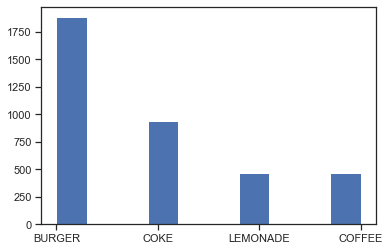

In [51]:
# Data exploration
plt.hist(bau_data.ITEM_NAME)

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

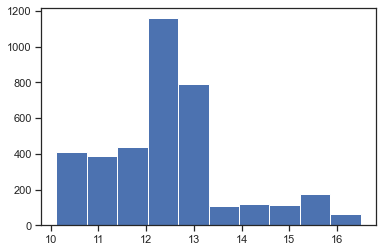

In [52]:
plt.hist(bau_data.PRICE)

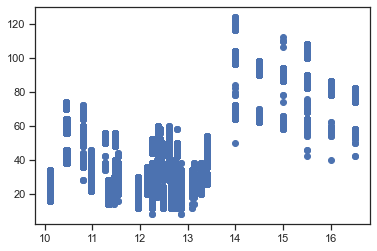

In [53]:
plt.scatter(combined_data['PRICE'], combined_data['QUANTITY'])

Text(0.5, 0, 'Price')

Text(0, 0.5, 'QUANTITY')

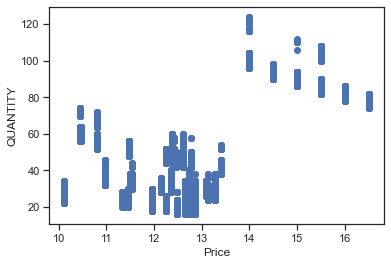

In [56]:
plt.scatter(bau_data['PRICE'], bau_data['QUANTITY'])
plt.xlabel('Price')
plt.ylabel('QUANTITY')
plt.show()

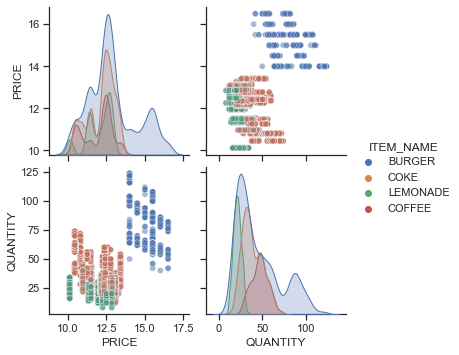

In [57]:
sns.pairplot(combined_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.5})

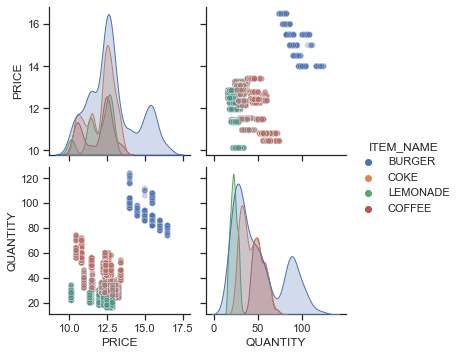

In [58]:
sns.pairplot(bau_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.3})

#### Observation:
The price density plot is bimodal. From the graph we can see that for all quantities, as the price is increased the quantity sold is decreased.

Although coke is hidden in this view. We can go ahead and calculate the price elasticities for this.

### Lets Look one item - burger and its sales and price range

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
5,2053,2,BURGER,1/13/12,12.60,58,2012,No Holiday,0,0,26.6,0
8,1070,0,BURGER,1/13/13,15.50,70,2013,No Holiday,1,0,30.2,0


(3348, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000
mean,1806.500000,1.500000,12.858572,44.974313,2013.351254,0.284349,0.200717,56.255914,0.878136
std,425.282579,0.866155,1.565046,25.747886,1.062567,0.451171,0.400596,19.996348,0.327177
min,1070.000000,0.000000,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,24.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.250000,2.000000,13.557500,60.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

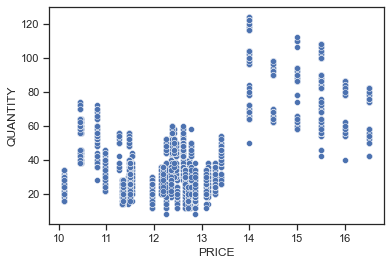

In [59]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

#### Observation:
From the above scatter plot it is clearly visible that there must be different types of burgers being sold. Now let's see the same distribution where we differentiate with SELL_ID which indicates if the burger was a part of the combo and hence, must treat it separately.

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

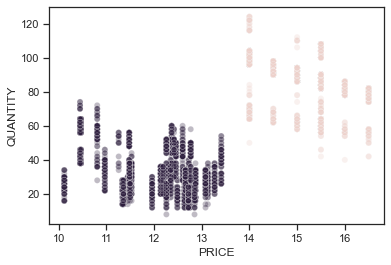

In [60]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.3)

In [61]:
np.unique(combined_data.SELL_ID)

array([1070, 2051, 2052, 2053], dtype=int64)

In [62]:
np.unique(combined_data.SELL_CATEGORY)

array([0, 2], dtype=int64)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
8,1070,0,BURGER,1/13/13,15.5,70,2013,No Holiday,1,0,30.2,0
16,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,1070.0,0.0,15.154719,82.685783,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.744770,15.981238,1.063043,0.451373,0.400776,20.005316,0.327324
min,1070.0,0.0,14.000000,40.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1070.0,0.0,14.500000,68.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,1070.0,0.0,15.500000,86.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,1070.0,0.0,15.500000,92.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

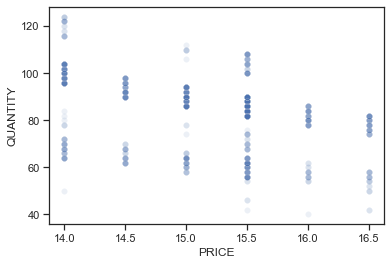

In [63]:
burger_1070 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 1070)]

burger_1070.head(3)
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

# Buliding a Model

### For the combined data

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           1.45e-32
Time:                        12:55:12   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

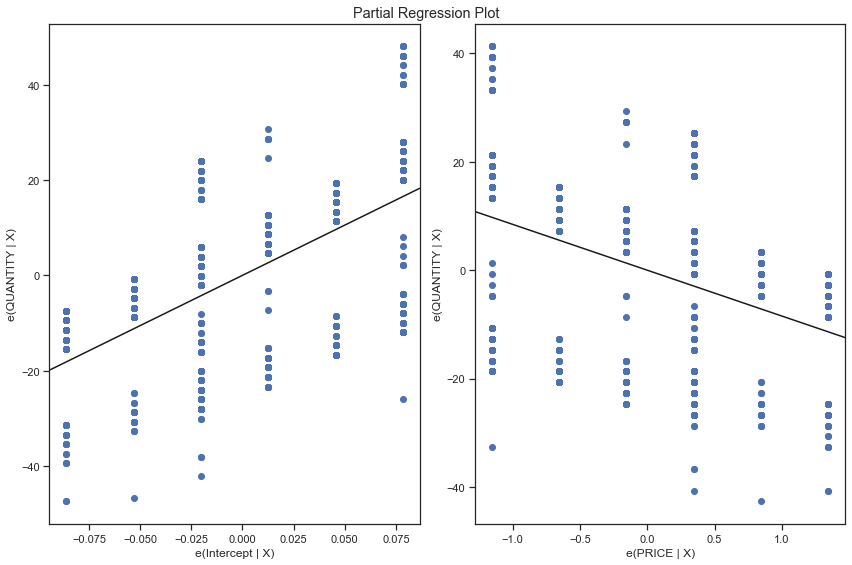

In [64]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

### For the Business in usual day data (BAU data)

(1884, 12)

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

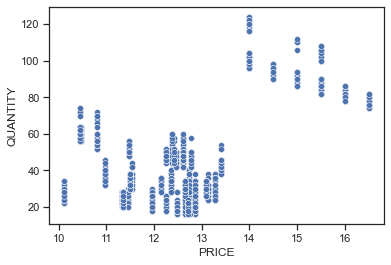

In [66]:
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
burger.shape

sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

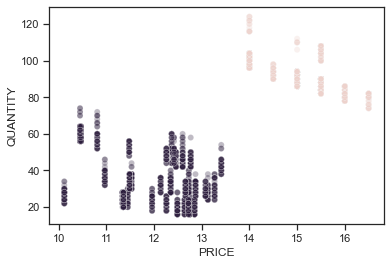

In [68]:
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.3)

In [72]:
np.unique(bau_data.SELL_ID)
np.unique(bau_data.SELL_CATEGORY)

array([1070, 2051, 2052, 2053], dtype=int64)

array([0, 2], dtype=int64)

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

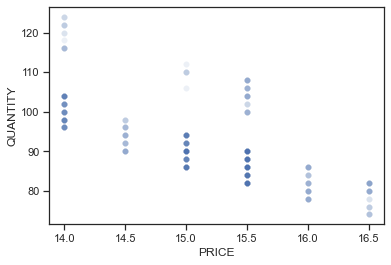

In [71]:
burger_1070 = bau_data[(bau_data['ITEM_NAME'] == 'BURGER') & (bau_data['SELL_ID'] == 1070)]
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

#### Observation:
As we can see, the scatter plot is much cleaner. Although there does seem to be 2 separate trends

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           7.16e-70
Time:                        12:59:00   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

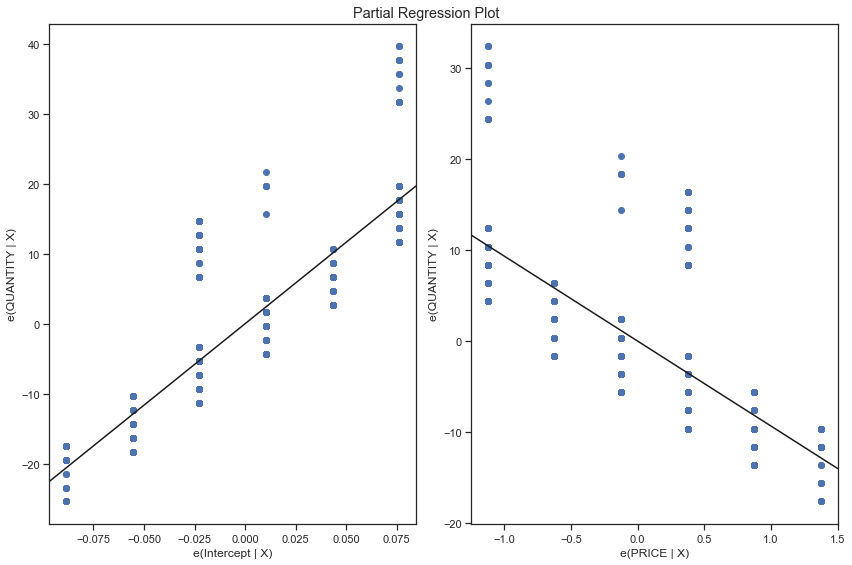

In [73]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

#### Let's look at the bau data again to see if there is anything else in the data we can use to further refine our model.

In [68]:
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


#### Creating a new model with Outdoors is 1

In [74]:
bau2_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) 
                          & (combined_data['IS_WEEKEND']==0)
                          & (combined_data['IS_OUTDOOR']==1)]

### burger_1070

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

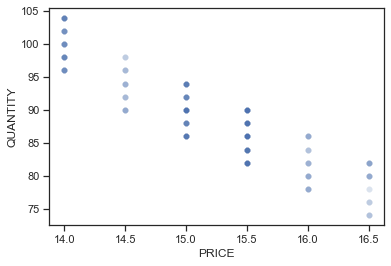

In [75]:
burger_1070 = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 1070)]

sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):          5.51e-153
Time:                        13:00:52   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

<Figure size 864x576 with 0 Axes>

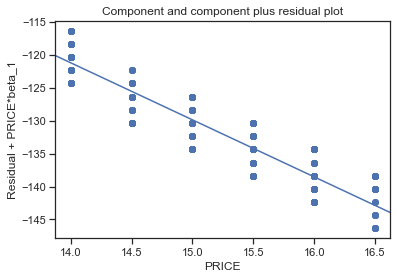

In [76]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(burger_model, "PRICE")

### burger_2051

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

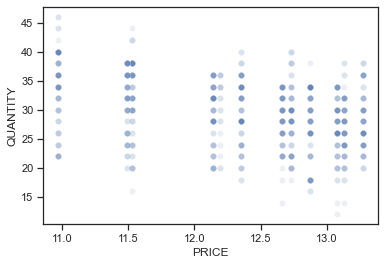

In [77]:
burger_2051 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 2051)]

sns.scatterplot(data = burger_2051, x = burger_2051.PRICE, y = burger_2051.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           4.45e-27
Time:                        13:02:12   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9906      3.184     20.411      0.0

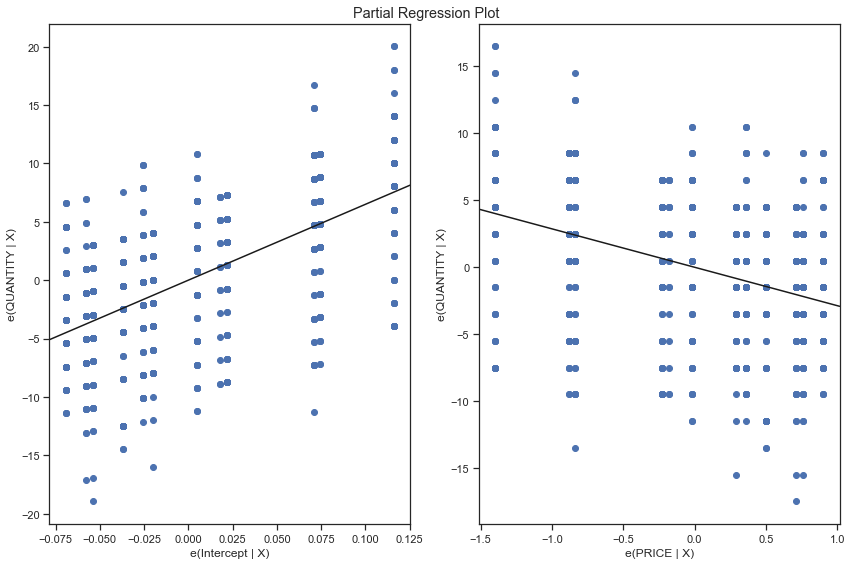

In [78]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_2051).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

## Lets apply model on differnet item(Coke) and see the elasticity 

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

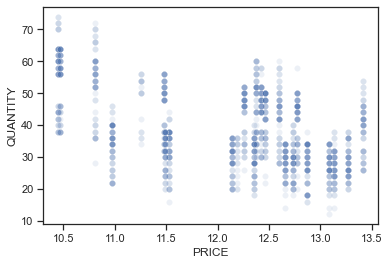

In [79]:
coke = combined_data[combined_data['ITEM_NAME'] == 'COKE']

sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Sun, 14 Nov 2021   Prob (F-statistic):          1.94e-104
Time:                        13:04:44   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

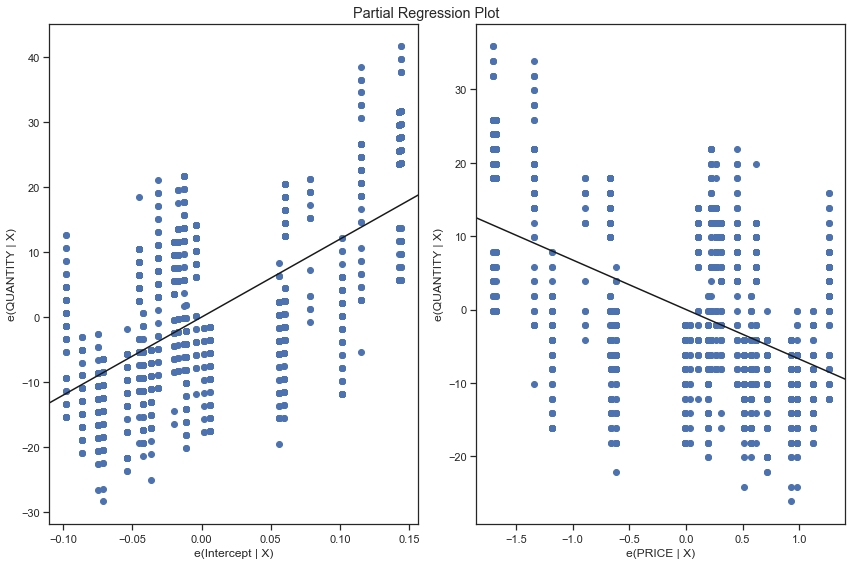

In [81]:
coke_model = ols("QUANTITY ~ PRICE", data=coke).fit()
print(coke_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)

## Model for Coffee

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

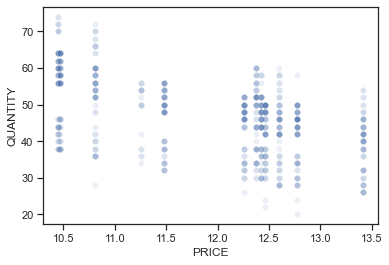

In [82]:
df = combined_data[combined_data['ITEM_NAME'] == 'COFFEE']

sns.scatterplot(x = df.PRICE, y = df.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           6.20e-62
Time:                        13:05:34   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.0

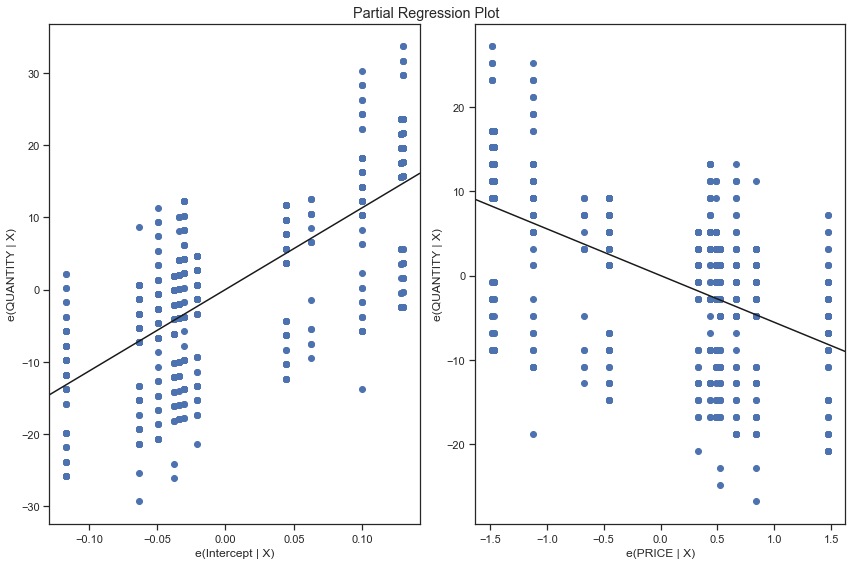

In [83]:
model = ols("QUANTITY ~ PRICE", data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

## Model for Lemonade

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

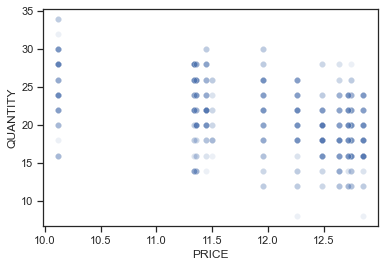

In [84]:
df = combined_data[combined_data['ITEM_NAME'] == 'LEMONADE']

sns.scatterplot(x = df.PRICE, y = df.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           7.46e-46
Time:                        13:06:34   Log-Likelihood:                -2347.4
No. Observations:                 837   AIC:                             4699.
Df Residuals:                     835   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4615      2.025     25.416      0.0

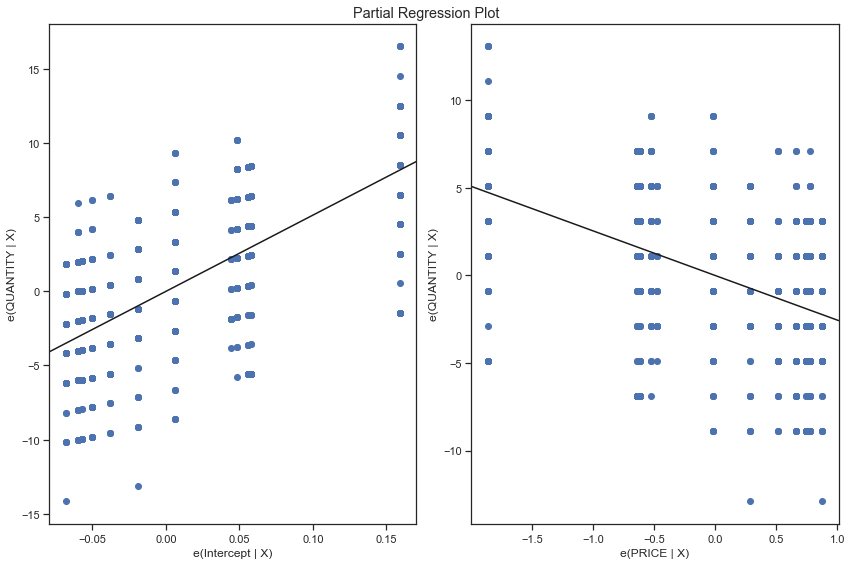

In [86]:
model = ols("QUANTITY ~ PRICE", data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [87]:
# Creating a dictionary of elasticities
elasticities = {}

In [88]:
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

### Price elasticity of burger_1070

Price elasticity of the product: -8.65858148847052
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):          5.51e-153
Time:                        13:07:05   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

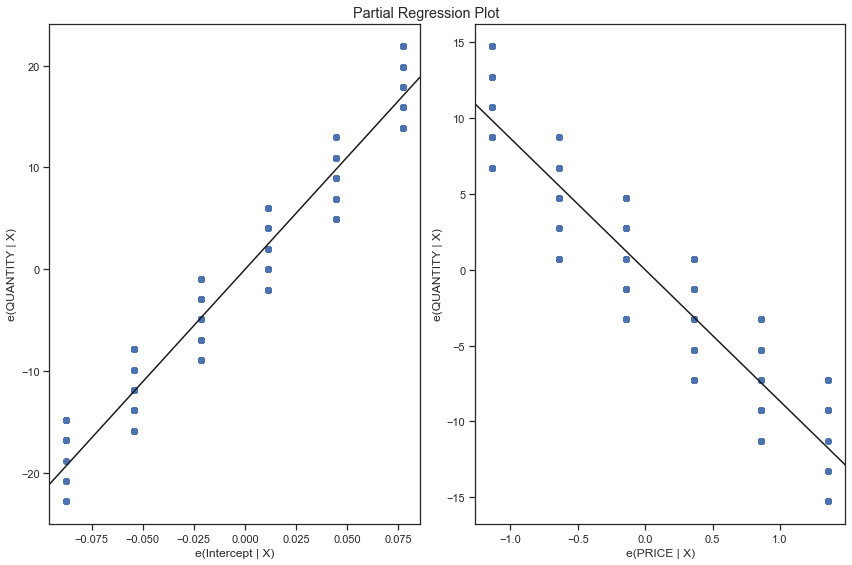

In [89]:
price_elasticity, model_burger_1070 = create_model_and_find_elasticity(burger_1070)
elasticities['burger_1070'] = price_elasticity

### Price elasticity of burger_2051

Price elasticity of the product: -3.61899061545631
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           1.34e-58
Time:                        13:08:52   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

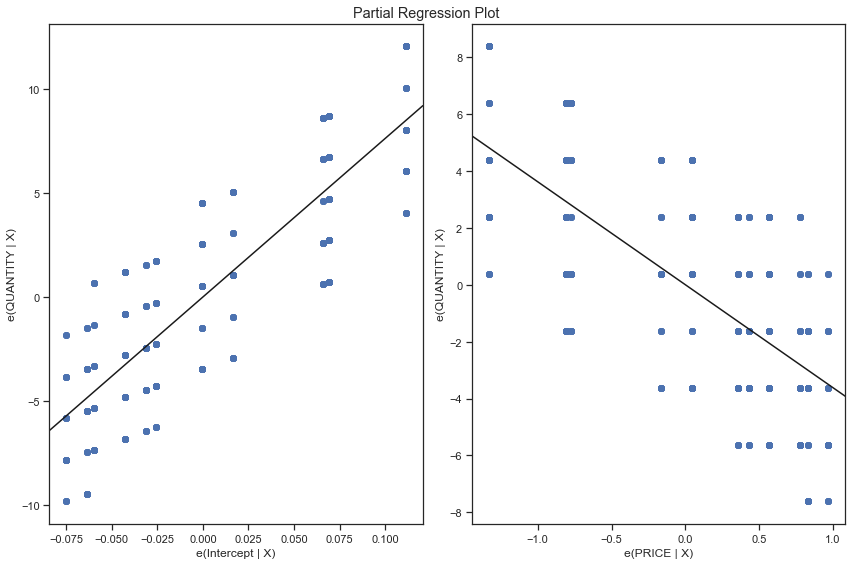

In [91]:
burger2051_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2051)]
elasticities['burger_2051'], model_burger_2051 = create_model_and_find_elasticity(burger2051_data)

### Price elasticity of burger_2052

Price elasticity of the product: -2.856702984559961
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           5.32e-53
Time:                        13:26:52   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


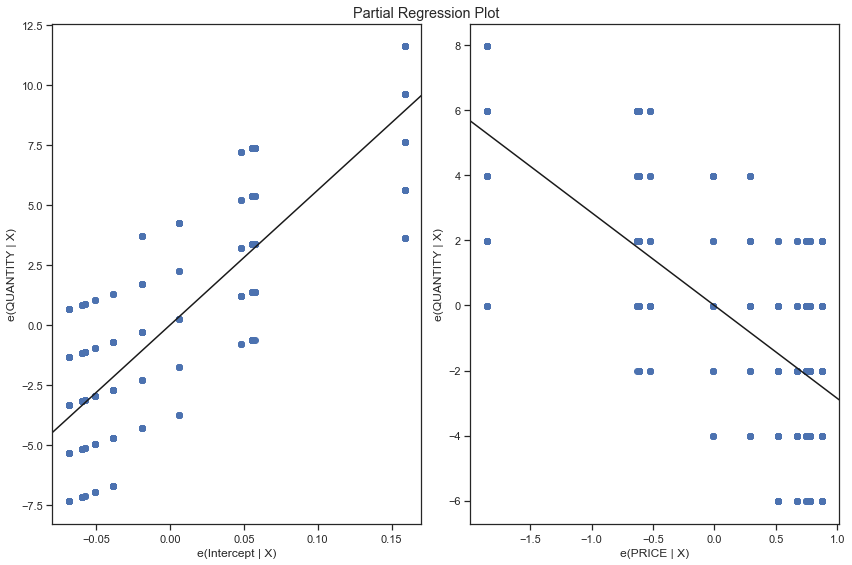

In [124]:
burger2052_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2052)]
elasticities['burger_2052'], model_burger_2052 = create_model_and_find_elasticity(burger2052_data)

### Price elasticity of burger_2053

Price elasticity of the product: -6.164156666230144
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):          3.72e-152
Time:                        13:26:58   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


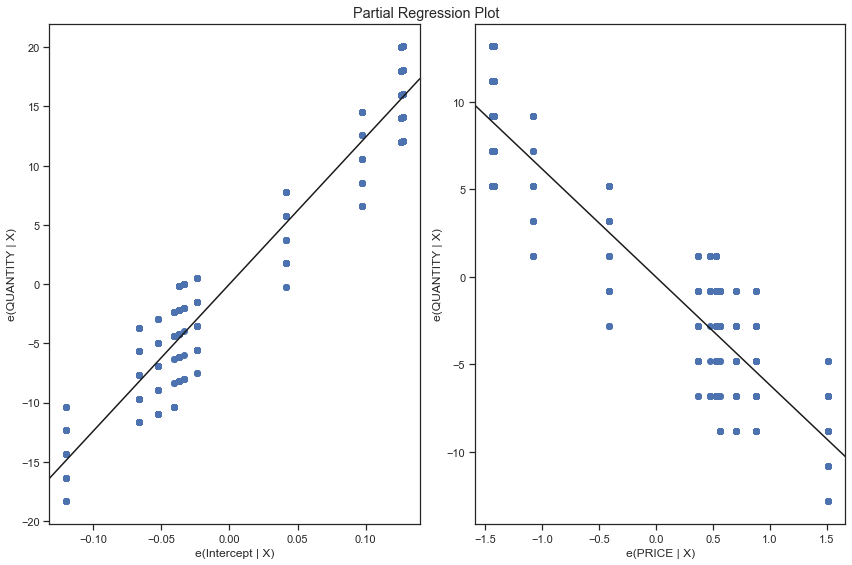

In [125]:
burger2053_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2053)]
elasticities['burger_2053'], model_burger_2053 = create_model_and_find_elasticity(burger2053_data)

### Price elasticity of Coke

Price elasticity of the product: -7.460103485084966
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     466.3
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           2.00e-82
Time:                        13:27:02   Log-Likelihood:                -2994.5
No. Observations:                 832   AIC:                             5993.
Df Residuals:                     830   BIC:                             6002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


(-7.460103485084966,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a7b6a81bb0>)

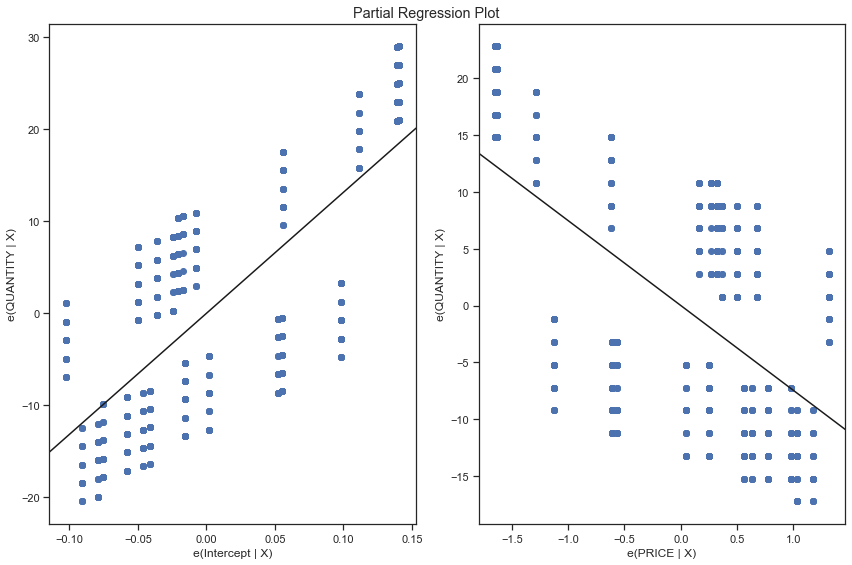

In [126]:
coke_data = bau2_data[bau2_data['ITEM_NAME'] == "COKE"]
create_model_and_find_elasticity(coke_data)

#### Observation:
2 coke are available in combo, while 1 is available as single. Therefore it is more likely that the bottom distribution belongs to single purchases of coke. 

In [94]:
coke_data = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 3067)]
elasticities['coke_3067'], model_coke_3067 = create_model_and_find_elasticity(coke_data)

ValueError: zero-size array to reduction operation maximum which has no identity

In [95]:
coke_data

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


### The Data is empty, there are no transactions on this type of coke 3067

### Price elasticity of Coke - 2053

Price elasticity of the product: -6.164156666230144
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):          3.72e-152
Time:                        13:14:01   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


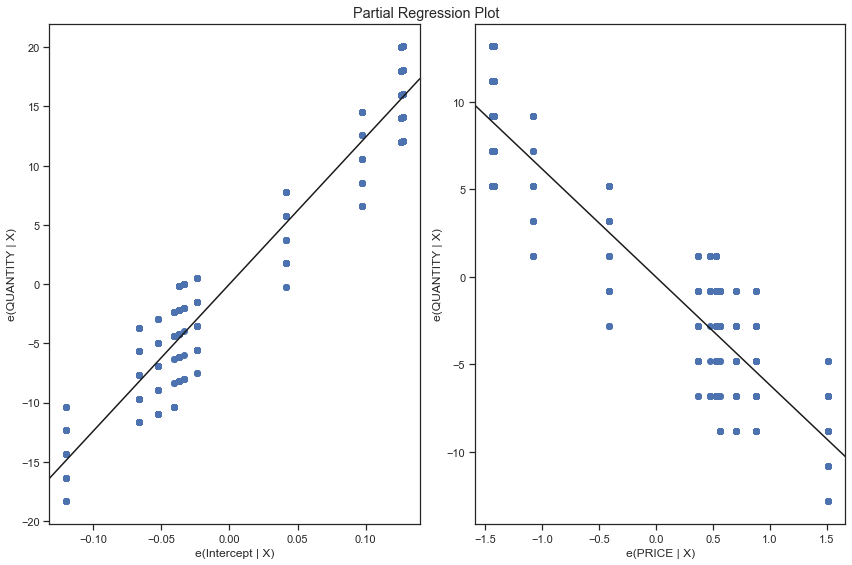

In [96]:
coke_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coke_2053'], model_coke_2053 = create_model_and_find_elasticity(coke_data_2053)

Price elasticity of the product: -3.61899061545631
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           1.34e-58
Time:                        13:24:20   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

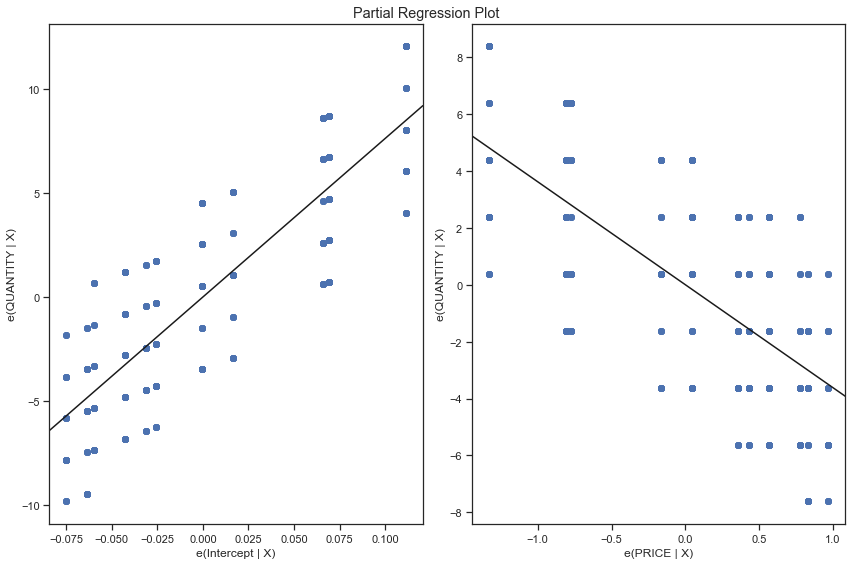

In [111]:
coke_data_2051 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2051)]
elasticities['coke_2051'], model_coke_2051 = create_model_and_find_elasticity(coke_data_2051)

### Price elasticity of LEMONADE _2052

Price elasticity of the product: -2.856702984559961
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           5.32e-53
Time:                        13:15:05   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


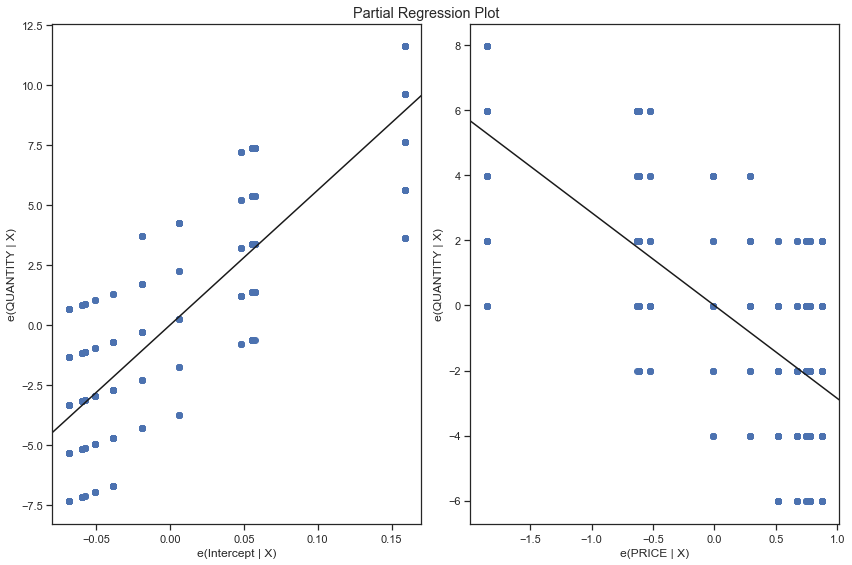

In [98]:
lemonade_data_2052 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 2052)]
elasticities['lemonade_2052'], model_lemonade_2052 = create_model_and_find_elasticity(lemonade_data_2052)

### Price elasticity of LEMONADE_3028

In [99]:
lemonade_data_3028 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 3028)]
elasticities['lemonade_3028'], model_lemonade_3028 = create_model_and_find_elasticity(lemonade_data_3028)

ValueError: zero-size array to reduction operation maximum which has no identity

### The Data is empty, there are no transactions on this type of LEMONADE_3028

### Price elasticity of coffee_2053

Price elasticity of the product: -6.164156666230144
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):          3.72e-152
Time:                        13:16:52   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


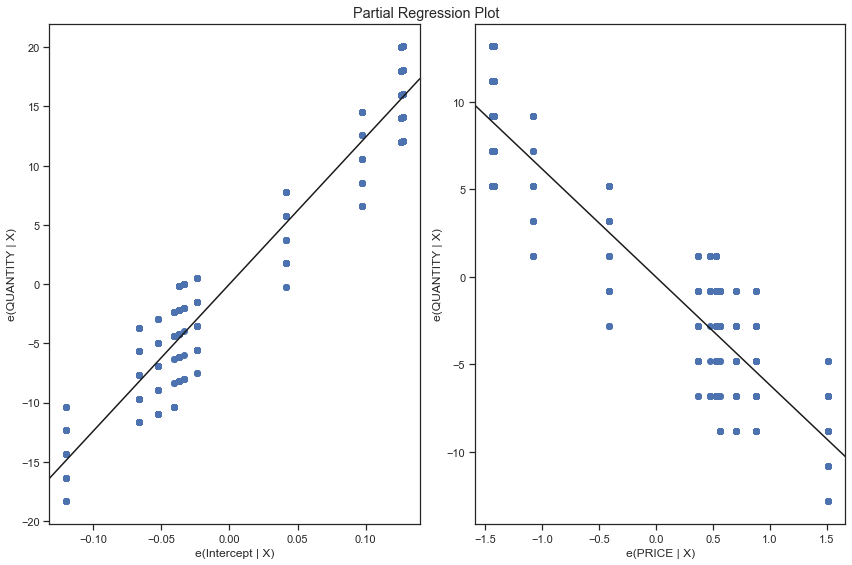

In [100]:
coffee_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coffee_2053'], model_coffee_2053 = create_model_and_find_elasticity(coffee_data_2053)

### Price elasticity of coffee_3055

In [102]:
coffee_data_3055 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 3055)]
elasticities['coffee_3055'], model_coffee_3055 = create_model_and_find_elasticity(coffee_data_3055)

ValueError: zero-size array to reduction operation maximum which has no identity

### The Data is empty, there are no transactions on this type of coffee_3055

## List the items and their price elasticities

In [104]:
elasticities

{'burger_1070': -8.65858148847052,
 'burger_2051': -3.61899061545631,
 'burger_2053': -6.164156666230144,
 'coke_2053': -6.164156666230144,
 'lemonade_2052': -2.856702984559961,
 'coffee_2053': -6.164156666230144}

# Find optimal price for maximum profit

Now, let's take coke (the sell_id was 2051 for the last coke data) and since we don't know the buying price of coke, let's assume it to be a little less than the minimum coke price in the dataset.

In [105]:
coke_data = coke_data_2053
print('Minimum price:',coke_data.PRICE.min())
print('Maximum price:',coke_data.PRICE.max())

Minimum price: 10.45
Maximum price: 13.41


Now Let's take 9 as the buying price of coke. We now want to be able to set the price of coke to get the maximum profit. PRICE is the selling price

In [106]:
buying_price_coke = 9

$coke data.PROFIT = (coke data.PRICE - buying price coke) * coke data.QUANTITY$

Let's see the profit for various price points:

In [107]:
start_price = 9.5
end_price = 20

In [108]:
# Creating a Test dataset with Price and Quantity
test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
test['PRICE'] = np.arange(start_price, end_price,0.01)

In [113]:
test['QUANTITY'] = model_coke_2051.predict(test['PRICE'])
test

,PRICE,QUANTITY
0,9.50,41.759021
1,9.51,41.722831
2,9.52,41.686641
3,9.53,41.650451
4,9.54,41.614261
5,9.55,41.578071
6,9.56,41.541881
7,9.57,41.505691
8,9.58,41.469501
9,9.59,41.433312


In [114]:
# Profit of the test data
test['PROFIT'] = (test["PRICE"] - buying_price_coke) * test["QUANTITY"]
test

,PRICE,QUANTITY,PROFIT
0,9.50,41.759021,20.879510
1,9.51,41.722831,21.278644
2,9.52,41.686641,21.677053
3,9.53,41.650451,22.074739
4,9.54,41.614261,22.471701
5,9.55,41.578071,22.867939
6,9.56,41.541881,23.263454
7,9.57,41.505691,23.658244
8,9.58,41.469501,24.052311
9,9.59,41.433312,24.445654


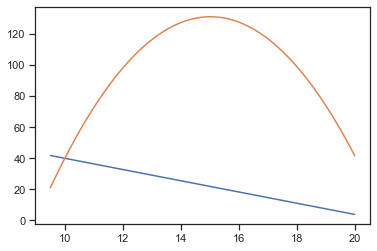

In [115]:
plt.plot(test['PRICE'],test['QUANTITY'])
plt.plot(test['PRICE'],test['PROFIT'])
plt.show()

### Let's find the exact price at which maximum profit is gained

In [116]:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [117]:
test.loc[[ind]]

,PRICE,QUANTITY,PROFIT
552,15.02,21.782193,131.128799


# Calculate the optimal price for all and list in table

In [118]:
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1
    end_price = data.PRICE.min() + 10
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])
    plt.plot(test['PRICE'],test['PROFIT'])
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit
    

In [119]:
optimal_price = {}
buying_price = 9

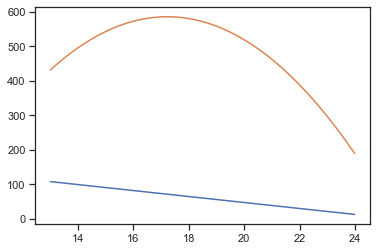

In [120]:
optimal_price['burger_1070'] = find_optimal_price(burger_1070, model_burger_1070, buying_price)

In [121]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572}

### Optimal Price for burger_2051

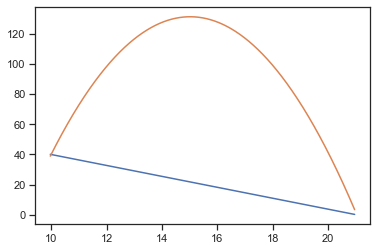

In [122]:
optimal_price['burger_2051'] = find_optimal_price(burger2051_data, model_burger_2051, buying_price)

### Optimal Price for burger_2052

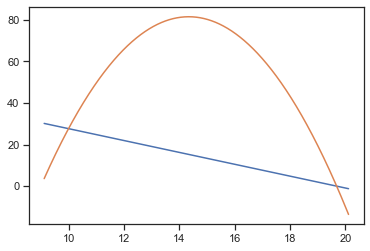

In [129]:
optimal_price['burger_2052'] = find_optimal_price(burger2052_data, model_burger_2052, buying_price)

### Optimal Price for burger_2053

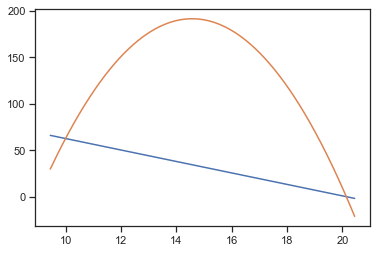

In [128]:
optimal_price['burger_2053'] = find_optimal_price(burger2053_data, model_burger_2053, buying_price)

### Optimal Price for coke_2051

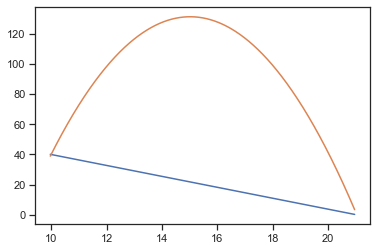

In [130]:
optimal_price['coke_2051'] = find_optimal_price(coke_data_2051, model_coke_2051, buying_price)

### Optimal Price for Coke_2053

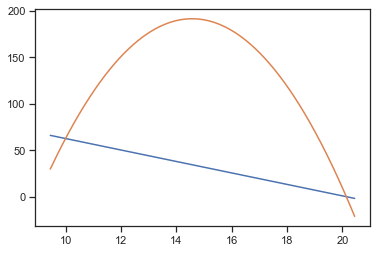

In [131]:
optimal_price['coke_2053'] = find_optimal_price(coke_data_2053, model_coke_2053, buying_price)

### Optimal Price for lemonade_2052

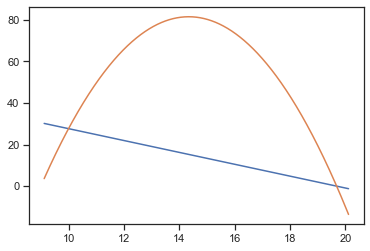

In [152]:
optimal_price['lemonade_2052'] = find_optimal_price(lemonade_data_2052, model_lemonade_2052, buying_price)

### Optimal Price for coffee_2053

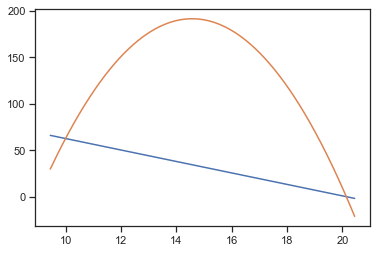

In [133]:
optimal_price['coffee_2053'] = find_optimal_price(coffee_data_2053, model_coffee_2053, buying_price)

In [134]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572,
 'burger_2051':      PRICE   QUANTITY      PROFIT
 505  15.02  21.782193  131.128799,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 522  14.34  15.259215  81.484211,
 'burger_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825,
 'coke_2051':      PRICE   QUANTITY      PROFIT
 505  15.02  21.782193  131.128799,
 'coke_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 522  14.34  15.259215  81.484211,
 'coffee_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825}

In [135]:
coke_data_2051.PRICE.describe()

count    416.000000
mean      12.301562
std        0.730620
min       10.970000
25%       11.530000
50%       12.350000
75%       12.870000
max       13.270000
Name: PRICE, dtype: float64

In [150]:
coffee_data_2053.PRICE.describe()

count    416.000000
mean      11.893726
std        0.983571
min       10.450000
25%       10.810000
50%       12.370000
75%       12.600000
max       13.410000
Name: PRICE, dtype: float64

In [151]:
lemonade_data_2052.PRICE.describe()

count    416.000000
mean      11.970264
std        0.849988
min       10.120000
25%       11.360000
50%       12.260000
75%       12.720000
max       12.850000
Name: PRICE, dtype: float64

# Conclusion

1. This is the price the cafe should set on it's item to earn maximum profit based on it's previous sales data. 

2. It is important to note that this is on a normal day. On 'other' days such as a holiday, or an event taking place have a different impact on customer buying behaviours and pattern. Usually an increase in consumption is seen on such days. These must be treated separately. 

3. Similarly, it is important to remove any external effects other than price that will affect the purchase behaviours of customers including the datapoints when the item was on discount.

### Note:
Once the new prices are put up, it is important to continuously monitor the sales and profit and there are other factors may affect the sales (Floods,Lockdown,Curfew etc) which are need to be consider.